# Exploration des données climatiques

## Différences entre les deux années présentes
## PCA
## Comparaison

In [1]:
import pandas as pd
from datetime import *
import seaborn as sns
from matplotlib.mlab import PCA as mlabPCA
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d


%matplotlib inline

In [2]:
# Read the CSV file (utf-8 encoded)
df = pd.read_csv('./data/DataRisaralda_v2_utf-8.csv', header=0, sep=',', index_col=0, parse_dates=False, encoding='utf-8')



Tableaux de colonnes, utile pour grouper

In [3]:
cols = ['Malla 17-18','Malla 14-16','Malla <13','Negros y vinagres','Broca','Broca de punto','Veteado','Mordido',
         'Inmaduro','Flojo','Sobresecado','Arrugado','Aplastado','Cristalizado','Reposado','Granizo','Conchas',
         'Partido','Ambar','Defectos totales','Humedad (%)','Merma (%)','Aroma-Fragancia',
         'Acidez','Cuerpo','Sabor',
         'Sabor residual','Dulzor','Uniformidad','Balance','Taza limpia','Puntaje catador','Puntaje Total',
         'prec1','prec2','prec3','prec4','prec5','prec6','prec7','prec8','prec9','prec10','tmin1','tmin2','tmin3','tmin4','tmin5',
         'tmin6','tmin7','tmin8','tmin9','tmin10','tmax1','tmax2','tmax3','tmax4','tmax5','tmax6','tmax7','tmax8','tmax9','tmax10',
         'tmean1','tmean2','tmean3','tmean4','tmean5','tmean6','tmean7','tmean8','tmean9','tmean10','dtr1','dtr2','dtr3','dtr4',
         'dtr5','dtr6','dtr7','dtr8','dtr9','dtr10']

In [4]:
# Champs concernants le climat

precs = ['prec1','prec2','prec3','prec4','prec5','prec6','prec7','prec8','prec9','prec10']
tmins = ['tmin1','tmin2','tmin3','tmin4','tmin5','tmin6','tmin7','tmin8','tmin9','tmin10']
tmaxs = ['tmax1','tmax2','tmax3','tmax4','tmax5','tmax6','tmax7','tmax8','tmax9','tmax10']
tmeans = ['tmean1','tmean2','tmean3','tmean4','tmean5','tmean6','tmean7','tmean8','tmean9','tmean10']
dtrs = ['dtr1','dtr2','dtr3','dtr4','dtr5','dtr6','dtr7','dtr8','dtr9','dtr10']

# Moyennes sur les 10 mois de mesures

climatAVG = ['PrecTotalAvg','TminTotalAvg','TmaxTotalAvg','TmeanTotalAvg','DtrTotalAvg']




# Analyse des valeurs climatiques sur les 10 mois

La moyenne des valeurs de chaque mois est utilisée.


## Observation des précipitations sur les 10 mois

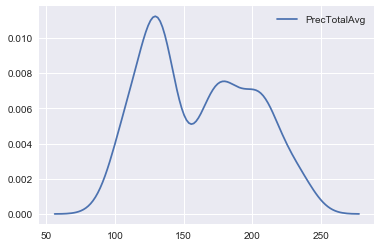

In [5]:
# Moyenne de précipitations sur 10 mois -> on observe 2 pics 
sns.kdeplot(df.PrecTotalAvg)

In [6]:
prec_groupby_year = df['PrecTotalAvg'].groupby(df['year'])

prec_groupby_year.describe()

year       
2011  count    351.000000
      mean     192.455840
      std       28.700576
      min      108.000000
      25%      172.000000
      50%      199.000000
      75%      212.000000
      max      245.000000
2016  count    416.000000
      mean     134.908654
      std       24.433264
      min       89.000000
      25%      118.750000
      50%      131.000000
      75%      140.000000
      max      189.000000
Name: PrecTotalAvg, dtype: float64

## Observation des Tmin sur 10 mois

year       
2011  count    351.000000
      mean      15.931624
      std        0.895000
      min       14.000000
      25%       15.000000
      50%       16.000000
      75%       16.000000
      max       20.000000
2016  count    416.000000
      mean      15.774038
      std        1.046808
      min       13.000000
      25%       15.000000
      50%       16.000000
      75%       16.000000
      max       20.000000
Name: TminTotalAvg, dtype: float64

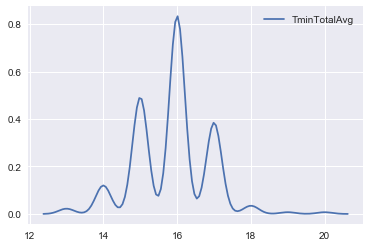

In [7]:
sns.kdeplot(df.TminTotalAvg)
tmin_groupby_year = df['TminTotalAvg'].groupby(df['year'])

tmin_groupby_year.describe()

## Observation des Tmax sur 10 mois

year       
2011  count    351.000000
      mean      24.971510
      std        1.628071
      min       21.000000
      25%       24.000000
      50%       25.000000
      75%       26.000000
      max       31.000000
2016  count    416.000000
      mean      25.538462
      std        1.231499
      min       22.000000
      25%       25.000000
      50%       26.000000
      75%       26.000000
      max       29.000000
Name: TmaxTotalAvg, dtype: float64

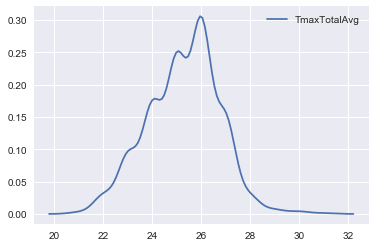

In [8]:
sns.kdeplot(df.TmaxTotalAvg)
tmax_groupby_year = df['TmaxTotalAvg'].groupby(df['year'])

tmax_groupby_year.describe()

## Observation des Tmean sur 10 mois

year       
2011  count    351.000000
      mean      20.475783
      std        1.234671
      min       18.000000
      25%       20.000000
      50%       20.000000
      75%       21.000000
      max       26.000000
2016  count    416.000000
      mean      20.656250
      std        1.117057
      min       18.000000
      25%       20.000000
      50%       21.000000
      75%       21.000000
      max       24.000000
Name: TmeanTotalAvg, dtype: float64

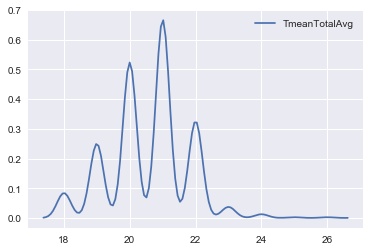

In [9]:
sns.kdeplot(df.TmeanTotalAvg)
tmean_groupby_year = df['TmeanTotalAvg'].groupby(df['year'])

tmean_groupby_year.describe()

## Observation des DTR sur 10 mois

year       
2011  count    351.000000
      mean       8.492877
      std        0.893999
      min        6.000000
      25%        8.000000
      50%        9.000000
      75%        9.000000
      max       11.000000
2016  count    416.000000
      mean       9.209135
      std        0.407180
      min        9.000000
      25%        9.000000
      50%        9.000000
      75%        9.000000
      max       10.000000
Name: DtrTotalAvg, dtype: float64

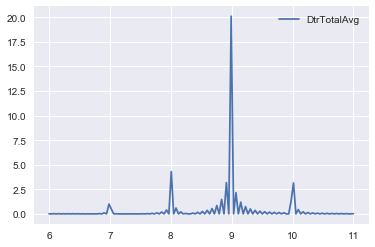

In [10]:
sns.kdeplot(df.DtrTotalAvg)
DTR_groupby_year = df['DtrTotalAvg'].groupby(df['year'])

DTR_groupby_year.describe()

## Observation des points totaux

In [11]:
Points_groupby_year = df['Puntaje Total'].groupby(df['year'])

Points_groupby_year.describe()

year       
2011  count    351.000000
      mean      65.525997
      std       30.520292
      min        0.000000
      25%       75.625000
      50%       79.000000
      75%       82.000000
      max       85.500000
2016  count    412.000000
      mean      78.928932
      std        8.702288
      min        0.000000
      25%       78.000000
      50%       81.750000
      75%       84.000000
      max       87.750000
Name: Puntaje Total, dtype: float64

In [12]:
colonnes = ['PrecTotalAvg','Puntaje Total']
#sns.clustermap(df[precs])

In [13]:
dftmp = df[['DtrTotalAvg','PrecTotalAvg','TminTotalAvg','TmaxTotalAvg','TmeanTotalAvg','Puntaje Total', 'year']]
dftmp.groupby(['year']).mean()

,DtrTotalAvg,PrecTotalAvg,TminTotalAvg,TmaxTotalAvg,TmeanTotalAvg,Puntaje Total
year,,,,,,
2011,8.492877,192.455840,15.931624,24.971510,20.475783,65.525997
2016,9.209135,134.908654,15.774038,25.538462,20.656250,78.928932


# Indexes des années

In [14]:
annee1 = 0
annee2 = 0
for index, row in df.iterrows():
    if row['year'] == 2011:
        annee1 = index
    if row['year'] == 2016:
        annee2 = index

print annee1
print annee2

391
956


# PCA des données climatiques (2011 en bleu, 2016 en rouge)

## Précipitations

In [15]:


#print mat
#print mat.T

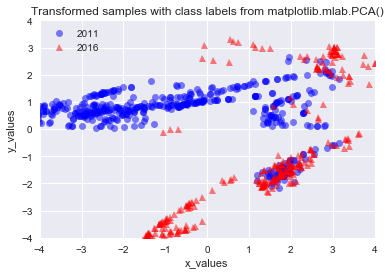

In [16]:
mat = np.array(df[precs])
mlab_pca = mlabPCA(mat)

#print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:488,0],mlab_pca.Y[0:488,1], 'o', markersize=7, color='blue', alpha=0.5, label=df['year'][40])
plt.plot(mlab_pca.Y[488:1098,0], mlab_pca.Y[488:1098,1], '^', markersize=7, color='red', alpha=0.5, label=df['year'][490])

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

## Températures moyennes

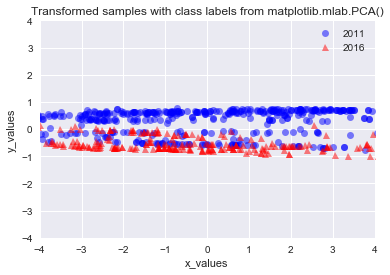

In [17]:
mat = np.array(df[tmeans])
mlab_pca = mlabPCA(mat)

#print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:488,0],mlab_pca.Y[0:488,1], 'o', markersize=7, color='blue', alpha=0.5, label=df['year'][40])
plt.plot(mlab_pca.Y[488:1098,0], mlab_pca.Y[488:1098,1], '^', markersize=7, color='red', alpha=0.5, label=df['year'][490])

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

## Températures maximales

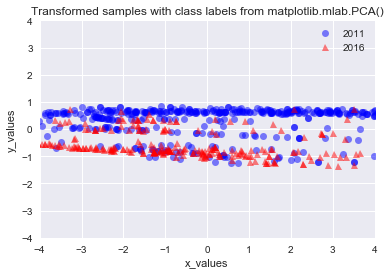

In [18]:
mat = np.array(df[tmaxs])
mlab_pca = mlabPCA(mat)

#print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:488,0],mlab_pca.Y[0:488,1], 'o', markersize=7, color='blue', alpha=0.5, label=df['year'][40])
plt.plot(mlab_pca.Y[488:1098,0], mlab_pca.Y[488:1098,1], '^', markersize=7, color='red', alpha=0.5, label=df['year'][490])

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

## Températures minimales

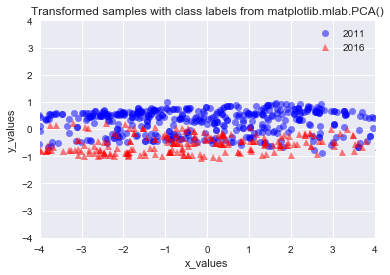

In [19]:
mat = np.array(df[tmins])
mlab_pca = mlabPCA(mat)

#print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:488,0],mlab_pca.Y[0:488,1], 'o', markersize=7, color='blue', alpha=0.5, label=df['year'][40])
plt.plot(mlab_pca.Y[488:1098,0], mlab_pca.Y[488:1098,1], '^', markersize=7, color='red', alpha=0.5, label=df['year'][490])

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

## Diurnal Temperature Range

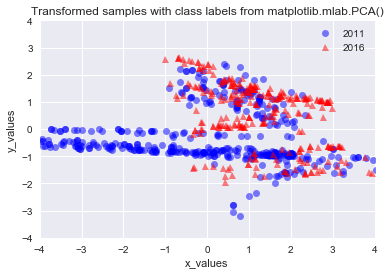

In [20]:
mat = np.array(df[dtrs])
mlab_pca = mlabPCA(mat)

#print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:488,0],mlab_pca.Y[0:488,1], 'o', markersize=7, color='blue', alpha=0.5, label=df['year'][40])
plt.plot(mlab_pca.Y[488:1098,0], mlab_pca.Y[488:1098,1], '^', markersize=7, color='red', alpha=0.5, label=df['year'][490])

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()


## Toutes les données climatiques

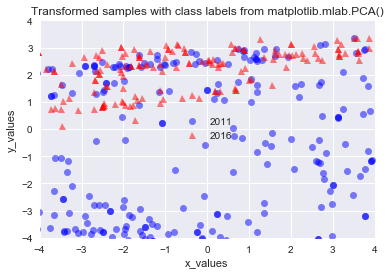

In [21]:
climat = [ 'prec1','prec2','prec3','prec4','prec5','prec6','prec7','prec8','prec9','prec10','tmin1','tmin2','tmin3','tmin4','tmin5',
         'tmin6','tmin7','tmin8','tmin9','tmin10','tmax1','tmax2','tmax3','tmax4','tmax5','tmax6','tmax7','tmax8','tmax9','tmax10',
         'tmean1','tmean2','tmean3','tmean4','tmean5','tmean6','tmean7','tmean8','tmean9','tmean10','dtr1','dtr2','dtr3','dtr4',
         'dtr5','dtr6','dtr7','dtr8','dtr9','dtr10']

mat = np.array(df[climat])
mlab_pca = mlabPCA(mat)

#print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:488,0],mlab_pca.Y[0:488,1], 'o', markersize=7, color='blue', alpha=0.5, label=df['year'][40])
plt.plot(mlab_pca.Y[488:1098,0], mlab_pca.Y[488:1098,1], '^', markersize=7, color='red', alpha=0.5, label=df['year'][490])

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()